(100, 1)

Test Mean Squared Error: 644515.5000


Text(0, 0.5, 'Prediction')

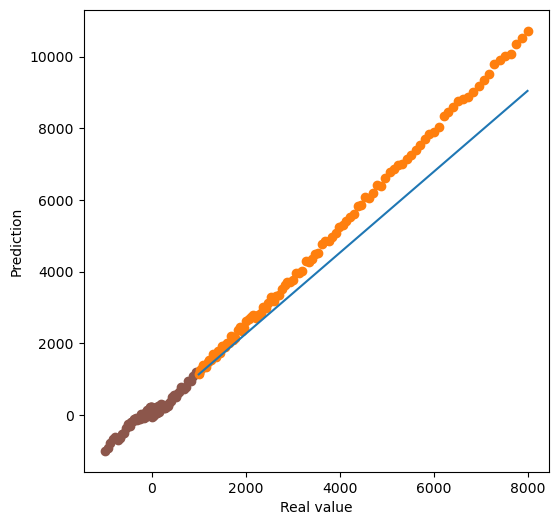

In [56]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torch import optim
from sklearn.preprocessing import StandardScaler

data_train = np.loadtxt("regression_train.txt") 
data_test = np.loadtxt("regression_test.txt") 

X_train = data_train[:,0].reshape(-1, 1) ** 3 # 100, 1 shape without reshape
y_train = data_train[:,1].reshape(-1, 1)

print(X_train.shape)

X_test = data_test[:,0].reshape(-1, 1) ** 3 
y_test = data_test[:,1].reshape(-1, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

loss_fn = nn.MSELoss()

learning_rate = 0.001
epochs = 100

optimizer = optim.LBFGS(model.parameters(), lr=learning_rate)

def train_loop(X_train, y_train, epochs, model, loss_fn, optimizer):
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()  # Reset gradients
            predictions = model(X_train)  # Forward pass
            loss = loss_fn(predictions, y_train)  # Compute loss
            loss.backward()  # Backward pass
            return loss
        optimizer.step(closure)
        optimizer.zero_grad()

    # if (epoch + 1) % 10 == 0:
    #     print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

def test_model(X_test, y_test, model, loss_fn):
    with torch.no_grad():
        predictions = model(X_test)
        mse = loss_fn(predictions, y_test)
        print(f'\nTest Mean Squared Error: {mse.item():.4f}')

train_loop(X_train, y_train, epochs, model, loss_fn, optimizer)
test_model(X_test, y_test, model, loss_fn)

X_train_plt = X_train.numpy()
y_train_plt = y_train.numpy()
X_test_plt = X_test.numpy()
y_test_plt = y_test.numpy()
predictions = model(X_test).detach().numpy()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train_plt, y_train_plt, c='#8c564b')
ax.scatter(X_test_plt, y_test_plt, c='#ff7f0e')
ax.plot(X_test_plt, predictions)
ax.set_xlabel('Real value')
ax.set_ylabel('Prediction')